# Neural Network Models for Object Recognition

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import TensorFlow
import tensorflow as tf

# Import Numpy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# Importing the CIFAR-10 dataset from Keras 
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print(f"X Train Size: {len(X_train)}\n X Test Size: {len(X_test)}" )

X Train Size: 50000
 X Test Size: 10000


In [4]:
# Print a sample from X_test dataset
print(X_test[42]) #Pixel Values

[[[149 149 150]
  [149 149 146]
  [140 140 139]
  ...
  [175 147 171]
  [165 149 164]
  [167 160 173]]

 [[147 147 147]
  [150 150 147]
  [140 140 140]
  ...
  [192 150 176]
  [183 146 166]
  [163 149 158]]

 [[149 149 149]
  [154 154 151]
  [142 142 142]
  ...
  [193 138 162]
  [200 149 170]
  [193 168 178]]

 ...

 [[117 125 136]
  [ 87  91 108]
  [ 65  61  74]
  ...
  [ 50  21  33]
  [ 19  16  19]
  [ 16  19  21]]

 [[125 136 144]
  [110 116 133]
  [ 69  67  83]
  ...
  [ 58  24  38]
  [ 18  16  19]
  [ 16  19  20]]

 [[152 166 172]
  [120 128 145]
  [ 69  69  87]
  ...
  [ 68  37  50]
  [ 15  16  18]
  [ 15  19  20]]]


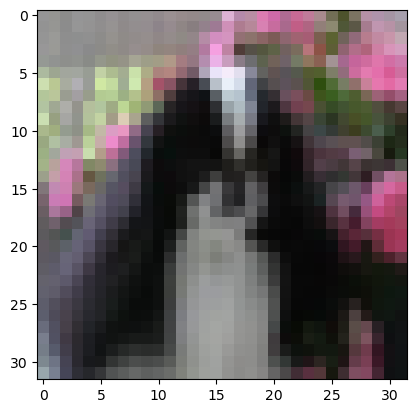

(32, 32, 3)

In [5]:
# Use the .imshow() function and show the plot
plt.imshow(X_test[42])
plt.show()
# Print the shape of the sample image
X_test[42].shape # RGB images have 3 channels 

In [6]:
# Create the validation datasets 
# and assign the last 10000 images of X_train and y_train
X_val = X_train[40000:]
y_val = y_train[40000:]
# Create new train datasets
# and assign the first 40000 images of X_train and y_train
X_train = X_train[:40000]
y_train = y_train[:40000]

In [7]:
# Print the lengths of the each dataset
print("X Train Length:", len(X_train))
print("X Test Length:", len(X_test))
print("X Val Length:", len(X_val))
print("Y Train Length:", len(y_train))
print("Y Test Length:", len(y_test))
print("Y Val Length:", len(y_val))

X Train Length: 40000
X Test Length: 10000
X Val Length: 10000
Y Train Length: 40000
Y Test Length: 10000
Y Val Length: 10000


In [8]:
# Divide each dataset by 255
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

In [9]:
# Create a model object
model = tf.keras.Sequential()

In [10]:
import keras
#from keras.layers import LeakyReLU
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3)))
model.add(tf.keras.layers.BatchNormalization())
# Hidden Layers
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add( tf.keras.layers.Dropout(0.20))

model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add( tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add( tf.keras.layers.Dropout(0.35))

In [11]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add( tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1028, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

In [12]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [13]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
# Train the model for 100 epochs 
results = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val))

Epoch 1/100
1250/1250 [==============================] - 71s 45ms/step - loss: 1.9343 - accuracy: 0.3796 - val_loss: 1.5886 - val_accuracy: 0.5008
Epoch 2/100
1250/1250 [==============================] - 47s 38ms/step - loss: 1.1754 - accuracy: 0.5958 - val_loss: 1.3147 - val_accuracy: 0.5633
Epoch 3/100
1250/1250 [==============================] - 45s 36ms/step - loss: 0.9574 - accuracy: 0.6720 - val_loss: 0.8287 - val_accuracy: 0.7129
Epoch 4/100
1250/1250 [==============================] - 51s 41ms/step - loss: 0.8222 - accuracy: 0.7208 - val_loss: 0.9139 - val_accuracy: 0.7036
Epoch 5/100
1250/1250 [==============================] - 40s 32ms/step - loss: 0.7116 - accuracy: 0.7618 - val_loss: 0.8306 - val_accuracy: 0.7186
Epoch 6/100
1250/1250 [==============================] - 38s 30ms/step - loss: 0.6243 - accuracy: 0.7913 - val_loss: 0.9148 - val_accuracy: 0.6984
Epoch 7/100
1250/1250 [==============================] - 39s 31ms/step - loss: 0.5491 - accuracy: 0.8166 - val_loss: 0

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 64)       2

In [16]:
from datetime import datetime
from packaging import version

In [17]:
import tensorboard
tensorboard.__version__

'2.10.1'

In [31]:
%load_ext tensorboard
%tensorboard --logdir logs
%reload_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 30944), started 8 days, 17:44:19 ago. (Use '!kill 30944' to kill it.)

In [19]:
#pip install pydot
#pip install graphviz

In [32]:
#from tensorflow.keras.utils import plot_model

#plot_model(model, show_shapes=True)

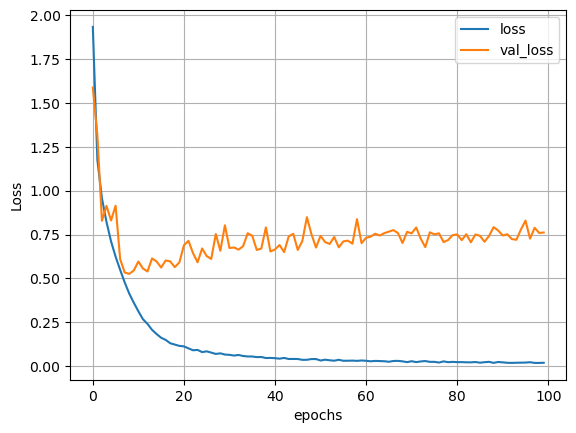

In [21]:
# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("epochs")
plt.ylabel("Loss")
# Put legend table
plt.legend()
plt.grid()
# Show the plot
plt.show()

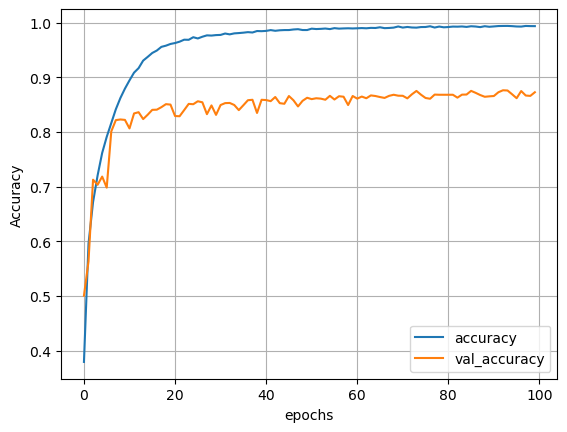

In [22]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")

# Name the x and y axises
plt.xlabel("epochs")
plt.ylabel("Accuracy")
# Put legend table
plt.legend()
plt.grid()
# Show the plot
plt.show()

In [23]:
# Evaluate the performance
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.8003 - accuracy: 0.8684


[0.8003295660018921, 0.868399977684021]

In [34]:
# Make prediction on the reshaped sample
predict_result = model.predict(X_test[42].reshape(1,32,32,3))
# Print the prediction result
print(predict_result)
# Find the predicted class
predict_class = predict_result.argmax()
# Find the prediction probability
predict_prob = predict_result.max()

1/1 [==============================] - 0s 126ms/step
[[1.6734614e-07 6.3005973e-07 6.1209593e-04 1.8883747e-01 1.9311553e-04
  7.8933442e-01 1.4350251e-08 2.0985968e-02 1.3090693e-05 2.3131197e-05]]


In [35]:
# Print the results
print(f"Image belongs to class: {predict_class}\n Prob is: {predict_prob}")

Image belongs to class: 5
 Prob is: 0.7893344163894653


313/313 [==============================] - 2s 7ms/step


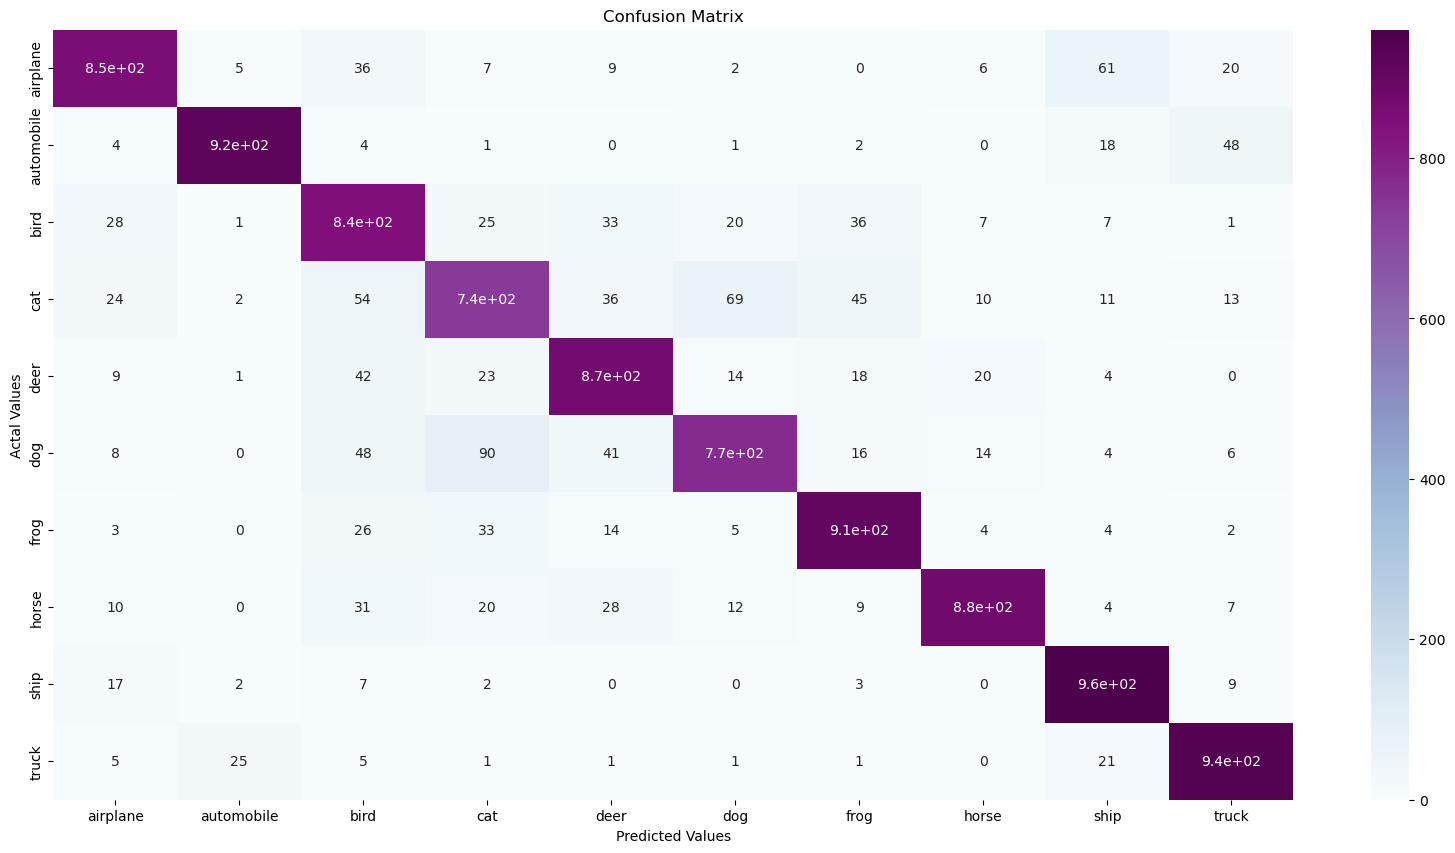

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

y_preds = model.predict(X_test)
y_pred=y_preds.argmax(axis=1)
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,index=class_names,
       columns=class_names)
plt.figure(figsize=(20,10))
sns.heatmap(cm_df, annot=True,cmap='BuPu')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [27]:
# MULTI-CLASS CONFUSION MATRIX FOR EACH CLASS

from sklearn.metrics import multilabel_confusion_matrix
from math import sqrt

# Actual and predicted classes
lst_actual_class = y_test
lst_predicted_class = y_pred

# Class = Label 0 to 9
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Compute multi-class confusion matrix
arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=class_names)

# Temp store results
store_sens = [];
store_spec = [];
store_acc = [];
store_bal_acc = [];
store_prec = [];
store_fscore = [];
store_mcc = [];
for no_class in range(len(class_names)):
    arr_data = arr_out_matrix[no_class];
    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    x = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(x), 3)
    store_sens.append(sensitivity);
    store_spec.append(specificity);
    store_acc.append(accuracy);
    store_bal_acc.append(balanced_accuracy);
    store_prec.append(precision);
    store_fscore.append(f1Score);
    store_mcc.append(MCC);

In [28]:
df1=pd.DataFrame(cm)
df1

,0,1,2,3,4,5,6,7,8,9
0,854,5,36,7,9,2,0,6,61,20
1,4,922,4,1,0,1,2,0,18,48
2,28,1,842,25,33,20,36,7,7,1
3,24,2,54,736,36,69,45,10,11,13
4,9,1,42,23,869,14,18,20,4,0
5,8,0,48,90,41,773,16,14,4,6
6,3,0,26,33,14,5,909,4,4,2
7,10,0,31,20,28,12,9,879,4,7
8,17,2,7,2,0,0,3,0,960,9
9,5,25,5,1,1,1,1,0,21,940


In [29]:
df=pd.DataFrame(arr_out_matrix.reshape(10,-1), columns=["TN","FP","FN","TP"])
df['Recall'] = df.TP/(df.TP+df.FN)
df['Accuracy'] = (df.TP+df.TN)/(df.TN+df.FP+df.FN+df.TP)
df['Precision'] = (df.TP)/(df.FP+df.TP)
df['F1']=2*df.Recall*df.Precision/(df.Recall+df.Precision)
df

,TN,FP,FN,TP,Recall,Accuracy,Precision,F1
0,8892,108,146,854,0.854,0.9746,0.887734,0.870540
1,8964,36,78,922,0.922,0.9886,0.962422,0.941777
2,8747,253,158,842,0.842,0.9589,0.768950,0.803819
3,8798,202,264,736,0.736,0.9534,0.784648,0.759546
4,8838,162,131,869,0.869,0.9707,0.842871,0.855736
5,8876,124,227,773,0.773,0.9649,0.861761,0.814971
6,8870,130,91,909,0.909,0.9779,0.874880,0.891614
7,8939,61,121,879,0.879,0.9818,0.935106,0.906186
8,8866,134,40,960,0.960,0.9826,0.877514,0.916905
9,8894,106,60,940,0.940,0.9834,0.898662,0.918866


In [30]:
# OVERALL PERFORMANCE PREDICTION 

from statistics import mean
print("Overall Performance Prediction:");
print("Sensitivity: {0}%".format(round(mean(store_sens)*100, 4)));
print("Specificity: {0}%".format(round(mean(store_spec)*100, 4)));
print("Accuracy: {0}%".format(round(mean(store_acc)*100, 4)));
print("Balanced Accuracy: {0}%".format(round(mean(store_bal_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(store_prec)*100, 4)));
print("F1-Score: {0}%".format(round(mean(store_fscore)*100, 4)))
print("MCC: {0}\n".format(round(mean(store_mcc), 4)))

Overall Performance Prediction:
Sensitivity: 86.84%
Specificity: 98.54%
Accuracy: 97.38%
Balanced Accuracy: 92.7%
Precision: 86.96%
F1-Score: 86.82%
MCC: 0.8541

